In [9]:
import pandas as pd
import os

In [10]:
# List of file names to merge
files = [
    r"C:\Users\sanja\Downloads\CSV_files\ResaleFlatPricesBasedonApprovalDate19901999.csv",
    r"C:\Users\sanja\Downloads\CSV_files\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv",
   r"C:\Users\sanja\Downloads\CSV_files\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv",
    r"C:\Users\sanja\Downloads\CSV_files\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv",
    r"C:\Users\sanja\Downloads\CSV_files\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv"
]

In [11]:
merged_data = pd.DataFrame()

In [19]:
dataframes = []

In [20]:
# Loop through the list of file names and read their data into DataFrames
for file_name in files:
    data = pd.read_csv(file_name)
    dataframes.append(data)

# Concatenate the DataFrames into one
merged_data = pd.concat(dataframes, ignore_index=True)

# Save the merged data to a new CSV file
merged_data.to_csv('merged_file.csv', index=False)

In [21]:
merged_data.to_csv('Singapore Resale Flat Prices.csv', index=False)

In [22]:
df=pd.read_csv('Singapore Resale Flat Prices.csv')    
df

C:\Users\sanja\AppData\Local\Temp\ipykernel_21068\3974530893.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Singapore Resale Flat Prices.csv')


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
911477,2023-11,YISHUN,4 ROOM,851,YISHUN ST 81,04 TO 06,104.0,Model A,1988,520000.0,63 years 05 months
911478,2023-11,YISHUN,4 ROOM,865,YISHUN ST 81,04 TO 06,104.0,Model A,1988,520000.0,63 years 05 months
911479,2023-11,YISHUN,5 ROOM,315C,YISHUN AVE 9,04 TO 06,112.0,Improved,2015,645000.0,91 years
911480,2023-11,YISHUN,5 ROOM,342C,YISHUN RING RD,13 TO 15,113.0,Premium Apartment,2016,700000.0,91 years 03 months


# Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [24]:
df=pd.read_csv('Singapore Resale Flat Prices.csv')

In [25]:
df.shape

(911482, 11)

In [26]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [27]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
911477,2023-11,YISHUN,4 ROOM,851,YISHUN ST 81,04 TO 06,104.0,Model A,1988,520000.0,63 years 05 months
911478,2023-11,YISHUN,4 ROOM,865,YISHUN ST 81,04 TO 06,104.0,Model A,1988,520000.0,63 years 05 months
911479,2023-11,YISHUN,5 ROOM,315C,YISHUN AVE 9,04 TO 06,112.0,Improved,2015,645000.0,91 years
911480,2023-11,YISHUN,5 ROOM,342C,YISHUN RING RD,13 TO 15,113.0,Premium Apartment,2016,700000.0,91 years 03 months
911481,2023-11,YISHUN,EXECUTIVE,723,YISHUN ST 71,04 TO 06,142.0,Apartment,1986,715000.0,61 years 07 months


In [28]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [29]:
df = df.drop(['month','street_name','lease_commence_date', 'block','flat_model'], axis=1)
df

,town,flat_type,storey_range,floor_area_sqm,resale_price,remaining_lease
0,ANG MO KIO,1 ROOM,10 TO 12,31.0,9000.0,NaN
1,ANG MO KIO,1 ROOM,04 TO 06,31.0,6000.0,NaN
2,ANG MO KIO,1 ROOM,10 TO 12,31.0,8000.0,NaN
3,ANG MO KIO,1 ROOM,07 TO 09,31.0,6000.0,NaN
4,ANG MO KIO,3 ROOM,04 TO 06,73.0,47200.0,NaN
...,...,...,...,...,...,...
911477,YISHUN,4 ROOM,04 TO 06,104.0,520000.0,63 years 05 months
911478,YISHUN,4 ROOM,04 TO 06,104.0,520000.0,63 years 05 months
911479,YISHUN,5 ROOM,04 TO 06,112.0,645000.0,91 years
911480,YISHUN,5 ROOM,13 TO 15,113.0,700000.0,91 years 03 months


In [31]:
df = df.drop(["remaining_lease"], axis = 1)
df

,town,flat_type,storey_range,floor_area_sqm,resale_price
0,ANG MO KIO,1 ROOM,10 TO 12,31.0,9000.0
1,ANG MO KIO,1 ROOM,04 TO 06,31.0,6000.0
2,ANG MO KIO,1 ROOM,10 TO 12,31.0,8000.0
3,ANG MO KIO,1 ROOM,07 TO 09,31.0,6000.0
4,ANG MO KIO,3 ROOM,04 TO 06,73.0,47200.0
...,...,...,...,...,...
911477,YISHUN,4 ROOM,04 TO 06,104.0,520000.0
911478,YISHUN,4 ROOM,04 TO 06,104.0,520000.0
911479,YISHUN,5 ROOM,04 TO 06,112.0,645000.0
911480,YISHUN,5 ROOM,13 TO 15,113.0,700000.0


# Data preprocessing

In [33]:
#Missing values in a dataframe
df.isnull().sum()

town              0
flat_type         0
storey_range      0
floor_area_sqm    0
resale_price      0
dtype: int64

# Checking datatypes

In [35]:
df.dtypes

town               object
flat_type          object
storey_range       object
floor_area_sqm    float64
resale_price      float64
dtype: object

In [36]:
# Let's rename the column so it will be clearer
df = df.rename(columns={'flat_type':'number_of_rooms','storey_range':'storey'})

In [37]:
print("Unique values of town \n")
print(df['town'].unique())

Unique values of town 

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT TIMAH'
 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS'
 'YISHUN' 'LIM CHU KANG' 'SEMBAWANG' 'BUKIT PANJANG' 'PASIR RIS' 'PUNGGOL']


In [38]:
print("Unique values of number_of_rooms \n")
print(df['number_of_rooms'].unique())

Unique values of number_of_rooms 

['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION' 'MULTI-GENERATION']


In [39]:
# I assume EXECUTIVE is equal to a 6 room (5 room + 1 study room). MULTI-GENERATION is equal to a 5 room (it served the same purpose).
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'EXECUTIVE','6 ROOM',regex=True)
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'MULTI-GENERATION','5 ROOM',regex=True)
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'MULTI GENERATION','5 ROOM',regex=True)
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'ROOM','',regex=True).astype('int')

In [40]:
df.head()

,town,number_of_rooms,storey,floor_area_sqm,resale_price
0,ANG MO KIO,1,10 TO 12,31.0,9000.0
1,ANG MO KIO,1,04 TO 06,31.0,6000.0
2,ANG MO KIO,1,10 TO 12,31.0,8000.0
3,ANG MO KIO,1,07 TO 09,31.0,6000.0
4,ANG MO KIO,3,04 TO 06,73.0,47200.0


In [41]:
# I assume that rather we use floor range, I the possible highest floor within the unit storey range.
df['storey'] = df['storey'].str[-2:].astype('int')
df.head()

,town,number_of_rooms,storey,floor_area_sqm,resale_price
0,ANG MO KIO,1,12,31.0,9000.0
1,ANG MO KIO,1,6,31.0,6000.0
2,ANG MO KIO,1,12,31.0,8000.0
3,ANG MO KIO,1,9,31.0,6000.0
4,ANG MO KIO,3,6,73.0,47200.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911482 entries, 0 to 911481
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   town             911482 non-null  object 
 1   number_of_rooms  911482 non-null  int32  
 2   storey           911482 non-null  int32  
 3   floor_area_sqm   911482 non-null  float64
 4   resale_price     911482 non-null  float64
dtypes: float64(2), int32(2), object(1)
memory usage: 27.8+ MB


# Outlier detection and correction

In [44]:
df.describe()

,number_of_rooms,storey,floor_area_sqm,resale_price
count,911482.000000,911482.000000,911482.000000,9.114820e+05
mean,4.012068,8.680429,95.699226,3.161177e+05
std,0.946362,4.801420,25.856785,1.664844e+05
min,1.000000,3.000000,28.000000,5.000000e+03
25%,3.000000,6.000000,73.000000,1.905250e+05
50%,4.000000,9.000000,93.000000,2.930000e+05
75%,5.000000,12.000000,113.000000,4.100000e+05
max,6.000000,51.000000,307.000000,1.500000e+06


# IQR - No. of rooms

In [46]:
#detecting Outlier for number_of_rooms column
iqr = df['number_of_rooms'].quantile(0.75) - df['number_of_rooms'].quantile(0.25)
upper_threshold = df['number_of_rooms'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['number_of_rooms'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(8.0, 0.0)

# Box plot

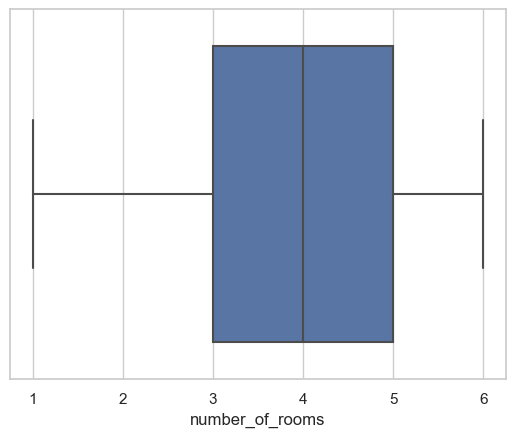

In [47]:
# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

# Specify the column(s) you want to create a boxplot for
sns.boxplot(x=df['number_of_rooms'])

# Show the boxplot
plt.show()

In [48]:
#detecting Outlier for storey column
iqr = df['storey'].quantile(0.75) - df['storey'].quantile(0.25)
upper_threshold = df['storey'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['storey'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(21.0, -3.0)

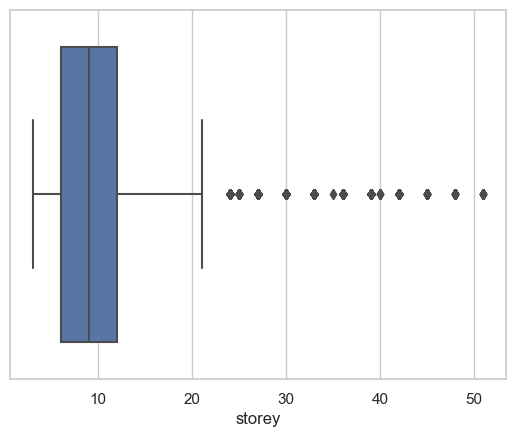

In [49]:
# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

# Specify the column(s) you want to create a boxplot for
sns.boxplot(x=df['storey'])

# Show the boxplot
plt.show()


In [50]:
#removing outlier for storey column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.storey	 = df.storey	.clip(lower_threshold, upper_threshold)

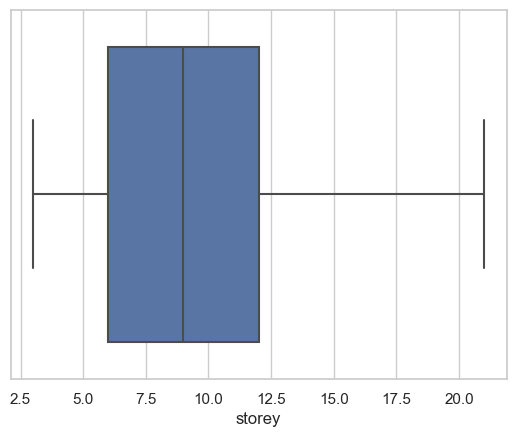

In [51]:
# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

# Specify the column(s) you want to create a boxplot for
sns.boxplot(x=df['storey'])

# Show the boxplot
plt.show()

# IQR - floor_area_sqm

In [52]:
#detecting Outlier for floor_area_sqm column
iqr = df['floor_area_sqm'].quantile(0.75) - df['floor_area_sqm'].quantile(0.25)
upper_threshold = df['floor_area_sqm'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['floor_area_sqm'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(173.0, 13.0)

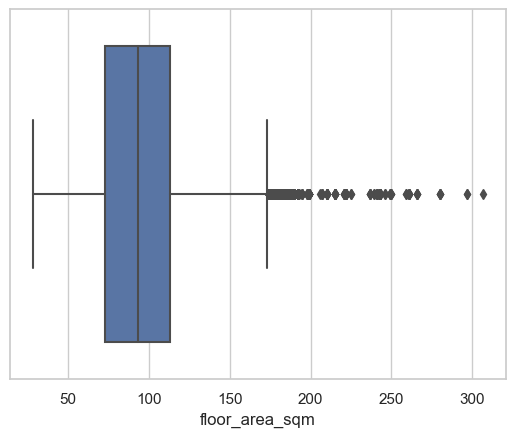

In [53]:
# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

# Specify the column(s) you want to create a boxplot for
sns.boxplot(x=df['floor_area_sqm'])

# Show the boxplot
plt.show()

In [54]:
#removing outlier for storey column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.floor_area_sqm	 = df.floor_area_sqm	.clip(lower_threshold, upper_threshold)


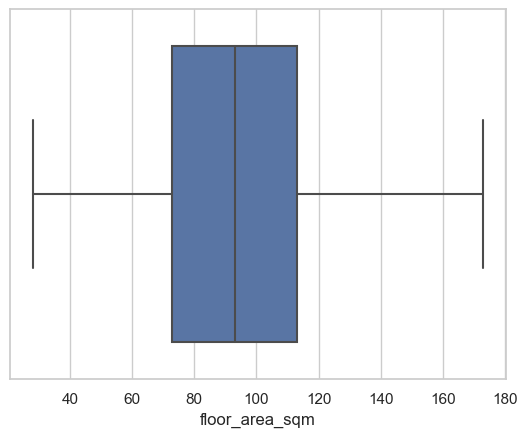

In [55]:
# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

# Specify the column(s) you want to create a boxplot for
sns.boxplot(x=df['floor_area_sqm'])

# Show the boxplot
plt.show()

In [56]:
#detecting Outlier for floor_area_sqm column
iqr = df['resale_price'].quantile(0.75) - df['resale_price'].quantile(0.25)
upper_threshold = df['resale_price'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['resale_price'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(739212.5, -138687.5)

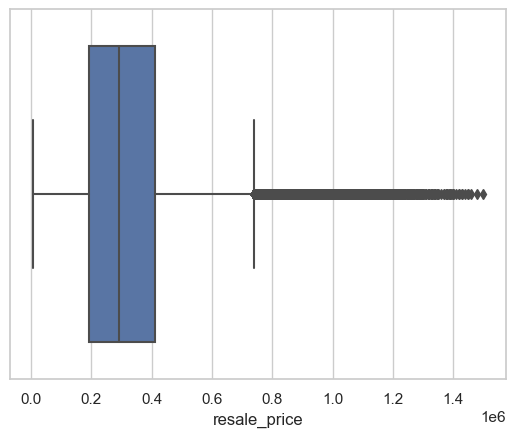

In [57]:
# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

# Specify the column(s) you want to create a boxplot for
sns.boxplot(x=df['resale_price'])

# Show the boxplot
plt.show()

In [58]:
#removing outlier for storey column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.resale_price	 = df.resale_price	.clip(lower_threshold, upper_threshold)

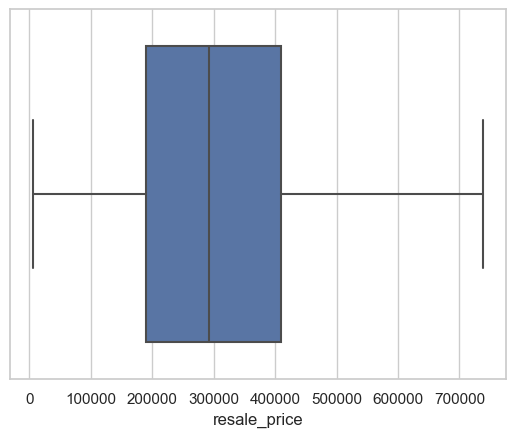

In [59]:

# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot

# Specify the column(s) you want to create a boxplot for
sns.boxplot(x=df['resale_price'])

# Show the boxplot
plt.show()

# EDA - Exploratory data analysis

In [60]:
number_of_rooms_counts = df['number_of_rooms'].value_counts()
number_of_rooms_counts

number_of_rooms
4    345616
3    292106
5    192395
6     68685
2     11381
1      1299
Name: count, dtype: int64

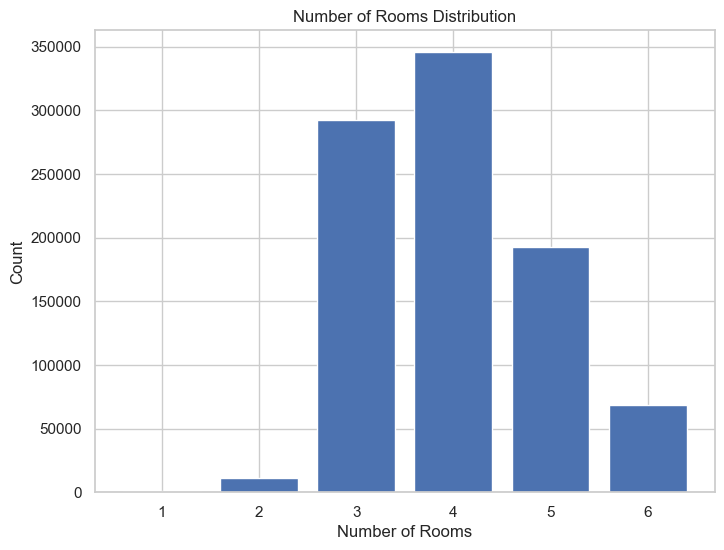

In [61]:
# Assuming 'number_of_rooms' is the column you want to plot
number_of_rooms = df['number_of_rooms']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(number_of_rooms.value_counts().index, number_of_rooms.value_counts())

# Add labels and title
plt.xlabel('Number of Rooms')
plt.ylabel('Count')
plt.title('Number of Rooms Distribution')

# Show the plot
plt.show()

In [62]:
number_of_rooms_counts = df['storey'].value_counts()
number_of_rooms_counts

storey
6     228958
9     206854
3     183626
12    176003
15     61767
21     25341
18     23494
5       2700
10      2474
20       265
Name: count, dtype: int64

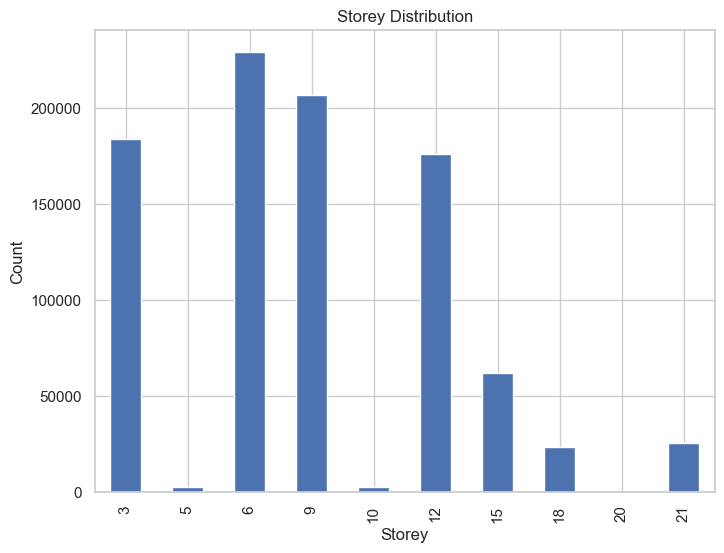

In [63]:
# Assuming 'storey' is the column you want to plot
storey_data = df['storey']

# Create a bar plot
plt.figure(figsize=(8, 6))
storey_counts = storey_data.value_counts().sort_index()
storey_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Storey')
plt.ylabel('Count')
plt.title('Storey Distribution')

# Show the plot
plt.show()


In [64]:
town_counts = df['town'].value_counts()
town_counts

town
TAMPINES           78875
YISHUN             68989
BEDOK              65884
JURONG WEST        65581
WOODLANDS          64394
ANG MO KIO         51474
HOUGANG            49801
BUKIT BATOK        43444
CHOA CHU KANG      37607
BUKIT MERAH        33769
PASIR RIS          32844
SENGKANG           31348
TOA PAYOH          31117
QUEENSTOWN         28398
GEYLANG            27843
CLEMENTI           27725
BUKIT PANJANG      27222
KALLANG/WHAMPOA    26719
JURONG EAST        24459
SERANGOON          22571
BISHAN             21059
PUNGGOL            19523
SEMBAWANG          13278
MARINE PARADE       7967
CENTRAL AREA        7043
BUKIT TIMAH         2484
LIM CHU KANG          64
Name: count, dtype: int64

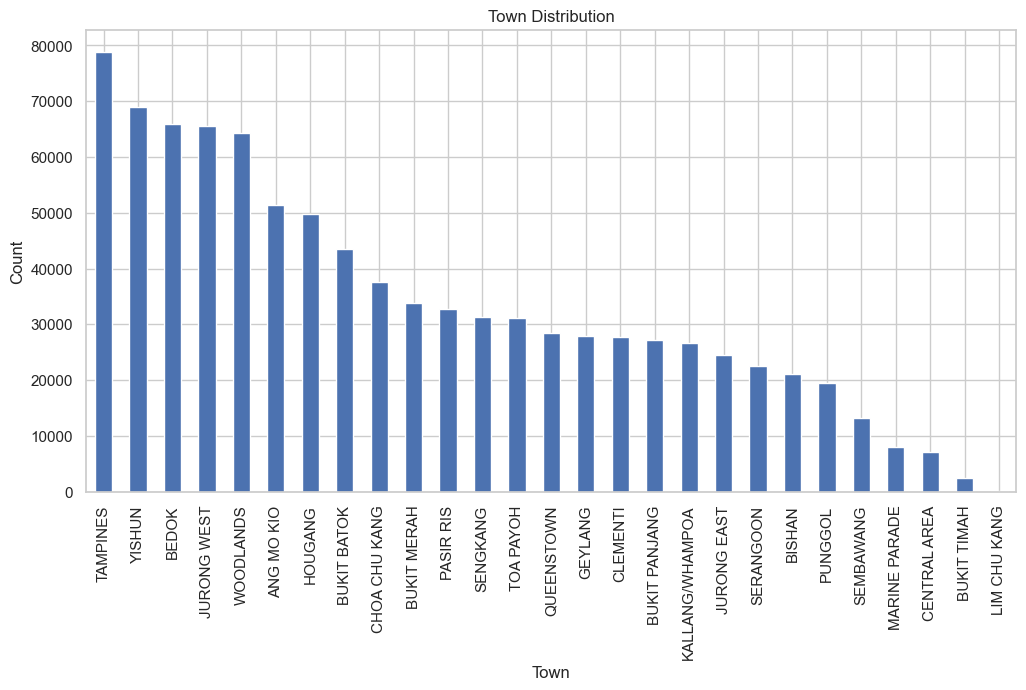

In [65]:
# Assuming 'town' is the column you want to plot
town_data = df['town']

# Create a bar plot
plt.figure(figsize=(12, 6))  # Optional: Set the figure size
town_counts = town_data.value_counts()
town_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Town')
plt.ylabel('Count')
plt.title('Town Distribution')

# Show the plot
plt.xticks(rotation=90)  # Rotate the town names on the x-axis for readability
plt.show()
     

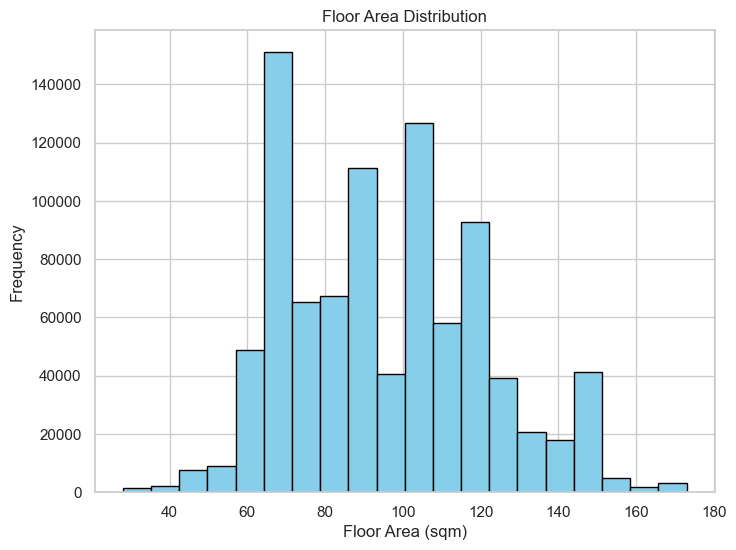

In [66]:
# Assuming 'floor_area_sqm' is the column you want to plot
floor_area_sqm = df['floor_area_sqm']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(floor_area_sqm, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Frequency')
plt.title('Floor Area Distribution')

# Show the plot
plt.show()


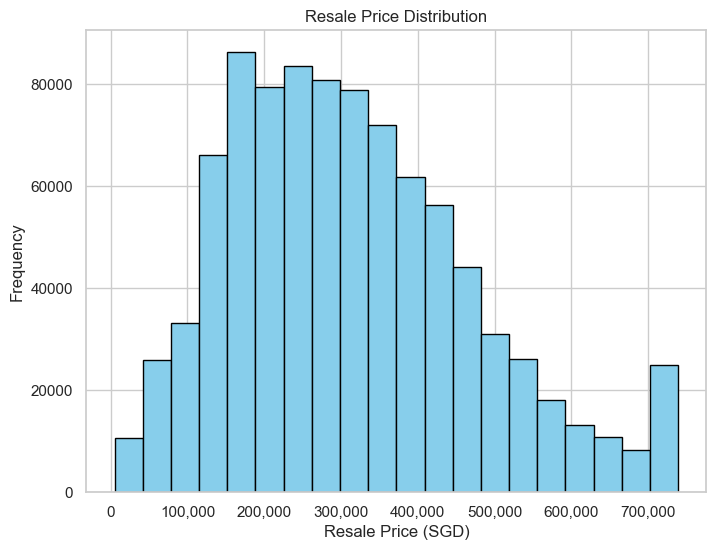

In [67]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming 'resale_price' is the column you want to plot
resale_price_data = df['resale_price']

# Create a histogram
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(resale_price_data, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Resale Price (SGD)')
plt.ylabel('Frequency')
plt.title('Resale Price Distribution')

# Format the x-axis tick labels
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Show the plot
plt.show()

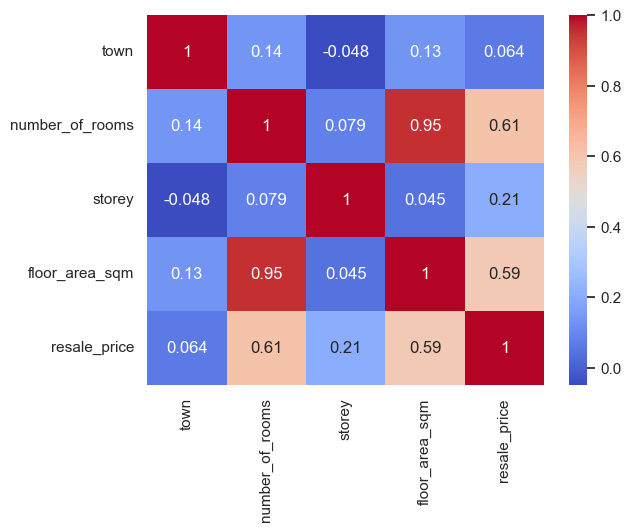

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame, you need to select the numeric columns.
numeric_df = df.select_dtypes(include=['number'])  # This selects all numeric columns.

# Calculate the correlation matrix for the numeric columns
corr = numeric_df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


# Machine learning modelling

In [69]:
from sklearn.preprocessing import LabelEncoder
# encode categorical variables
le = LabelEncoder()
df['town'] = le.fit_transform(df['town'])

In [70]:
X = df[['town', 'number_of_rooms', 'storey', 'floor_area_sqm']].values
y=df['resale_price'].values

In [71]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 3 )

In [72]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_ypred = mlr.predict(X_test)
mlr_acc = r2_score(y_test,mlr_ypred)
mlr_acc

0.40178131824122965

In [73]:
from sklearn.tree import DecisionTreeRegressor
tree_r = DecisionTreeRegressor()
tree_r.fit(X_train, y_train)
tree_ypred = tree_r.predict(X_test)
tree_acc = r2_score(y_test,tree_ypred)
tree_acc

0.5688151492629603

In [74]:
from sklearn.ensemble import RandomForestRegressor
forest_r = RandomForestRegressor(n_estimators = 10)
forest_r.fit(X_train, y_train)
forest_ypred = forest_r.predict(X_test)
forest_acc = r2_score(y_test,forest_ypred)
forest_acc

0.5693519636483414